In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as ply
%matplotlib inline
#matplotlib.styles.use('ggplot')

In [2]:
db_data = pd.read_csv("OPENDATA_BOOKING_CARSHARING.csv", sep = ';', header = 0)

In [3]:
db_data.head(10)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN
5,19313291,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:29:24,2014-08-06 15:45:00,2014-08-06 22:00:00,Ja,Ja,61.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN
6,19479182,100007,148005,C365278A6CDCEBE058E5EC06FF0C154686303010,2013-08-21 18:36:12,2014-01-22 18:00:00,2014-01-27 09:45:00,Nein,Nein,1365.0,Camberger Straße 10,401969,Camberger Straße 10,401969,Station,Frankfurt am Main,NaN
7,19508250,100006,156308,0E40E3CA959C55D8040775695FD9A3033201298B,2013-08-23 00:14:48,2014-05-24 15:00:00,2014-05-25 01:30:00,Nein,Nein,176.0,Bf Dammtor (Radisson Blu),400220,Bf Dammtor (Radisson Blu),400220,Station,Hamburg,Internet
8,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
9,19960704,100012,150715,E1B1BF157BDEF3542D79DC7EDF30437B9DC69B4A,2013-09-17 17:59:03,2014-01-11 09:45:00,2014-01-11 16:15:00,Nein,Nein,0.0,Hbf 1 Siegburg (Wilhelmstr.),400263,Hbf 1 Siegburg (Wilhelmstr.),400263,Station,Siegburg,Internet


In [4]:
#UNderstanding the data
#Count ALL the NULLS in all the columns of the data:
null_columns = db_data.columns[db_data.isnull().all()]
db_data.isnull().sum()
#Compare the rental zone IDs :
#if db_data['START_RENTAL_ZONE_HAL_ID'].all() == db_data['END_RENTAL_ZONE_HAL_ID'].all():
#    print("same")
#    del db_data['START_RENTAL_ZONE_HAL_ID'] # to avoid repetition of data.
#Compare the rental zones
#if db_data['START_RENTAL_ZONE'].all() == db_data['END_RENTAL_ZONE'].all():
#    print("gleish")

BOOKING_HAL_ID                   0
CATEGORY_HAL_ID                  0
VEHICLE_HAL_ID                   0
CUSTOMER_HAL_ID                  0
DATE_BOOKING                     0
DATE_FROM                        0
DATE_UNTIL                       0
COMPUTE_EXTRA_BOOKING_FEE        0
TRAVERSE_USE                     0
DISTANCE                       201
START_RENTAL_ZONE                0
START_RENTAL_ZONE_HAL_ID         0
END_RENTAL_ZONE                  0
END_RENTAL_ZONE_HAL_ID           0
RENTAL_ZONE_HAL_SRC              0
CITY_RENTAL_ZONE                 0
TECHNICAL_INCOME_CHANNEL     51976
dtype: int64

In [5]:
db_data.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID
count,5.480730e+05,548073.000000,548073.000000,547872.000000,548073.000000,548073.000000
mean,3.186900e+07,99387.465604,158833.711316,77.186951,353634.737294,353634.737294
std,7.206038e+06,8092.127076,7750.289663,159.879398,128089.698246,128089.698246
min,1.784220e+07,24.000000,143031.000000,0.000000,20.000000,20.000000
25%,2.601109e+07,100001.000000,151336.000000,14.000000,400575.000000,400575.000000
50%,3.061083e+07,100003.000000,156818.000000,32.000000,401814.000000,401814.000000
75%,3.718012e+07,100012.000000,163398.000000,80.000000,402743.000000,402743.000000
max,4.638581e+07,801003.000000,181564.000000,27500.000000,406429.000000,406429.000000


In [4]:
#Optimizing data
db_data['TRAVERSE'] = db_data['TRAVERSE_USE'].map({'Nein' : 0 , 'Ja':1}).astype(int)
db_data['EXTRA_BOOKING_FEE']= db_data['COMPUTE_EXTRA_BOOKING_FEE'].map({'Nein': 0 , 'Ja': 1}).astype(int)
db_data['RENTAL_ZONE_HAL_SRC']= db_data['RENTAL_ZONE_HAL_SRC'].map({'Station': 1}).astype(int)
db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,1,Köln,Internet,0,0
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,1,Oldenburg (Oldb),Internet,0,0
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,1,Stralsund,Internet,0,0
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,1,München,Internet,0,0
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,1,Fulda,NaN,1,1


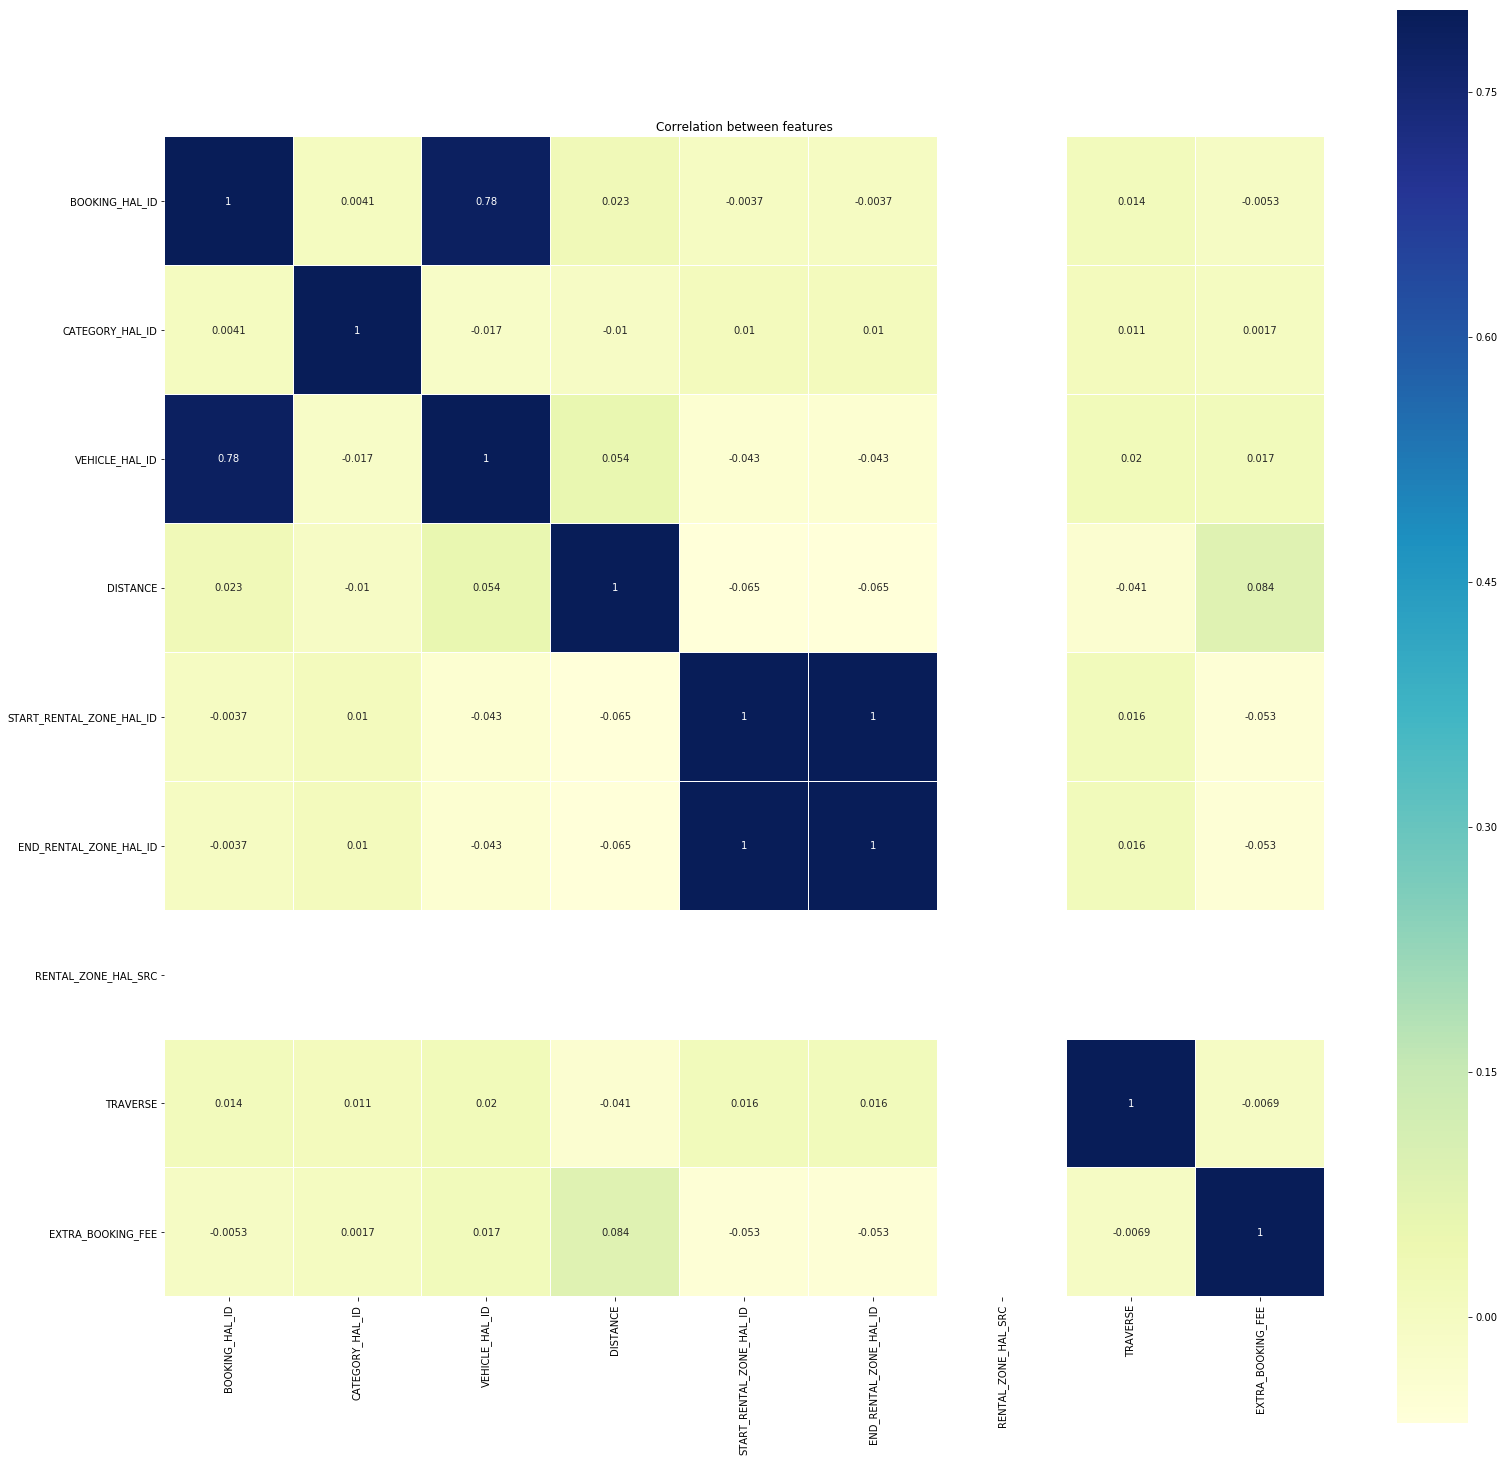

In [5]:
corr=db_data.corr()
plt.figure(figsize=(26, 26))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [8]:
db_data['CUSTOMER_HAL_ID'].describe()
# The customer F84361D042B7994A0B18B6ABD3E1ABCC8064B172 is the most important customer with total 2801 bookings.

count                                       548073
unique                                       56686
top       F84361D042B7994A0B18B6ABD3E1ABCC8064B172
freq                                          2801
Name: CUSTOMER_HAL_ID, dtype: object

In [9]:
#count the total no. of unique values of the customers
#db_data["CUSTOMER_HAL_ID"].value_counts()
db_data['RENTAL_ZONE_HAL_SRC'].value_counts() # all the values are the same.

1    548073
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

In [10]:
db_data['DATE_BOOKING'] = pd.to_datetime(db_data.DATE_BOOKING)
db_data['Y'] = db_data.DATE_BOOKING.dt.year
db_data['M'] = db_data.DATE_BOOKING.dt.month
db_data['D'] = db_data.DATE_BOOKING.dt.day
db_data['WD'] =db_data.DATE_BOOKING.dt.weekday
#db_data['BOOKING_DATE'] = db_data.DATE_BOOKING.datetime.datetime.strptime('2013-6-05', '%Y %m %d').strftime('%d-%m-%Y')
db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,TRAVERSE,EXTRA_BOOKING_FEE,Y,M,D,WEEK_DAY
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,...,401768,1,Köln,Internet,0,0,2013,6,5,2
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,...,400346,1,Oldenburg (Oldb),Internet,0,0,2013,6,25,1
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,...,32961,1,Stralsund,Internet,0,0,2013,8,1,3
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,...,401104,1,München,Internet,0,0,2013,8,1,3
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,...,404524,1,Fulda,NaN,1,1,2013,8,13,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x184F6F50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D45F5D0>], dtype=object)

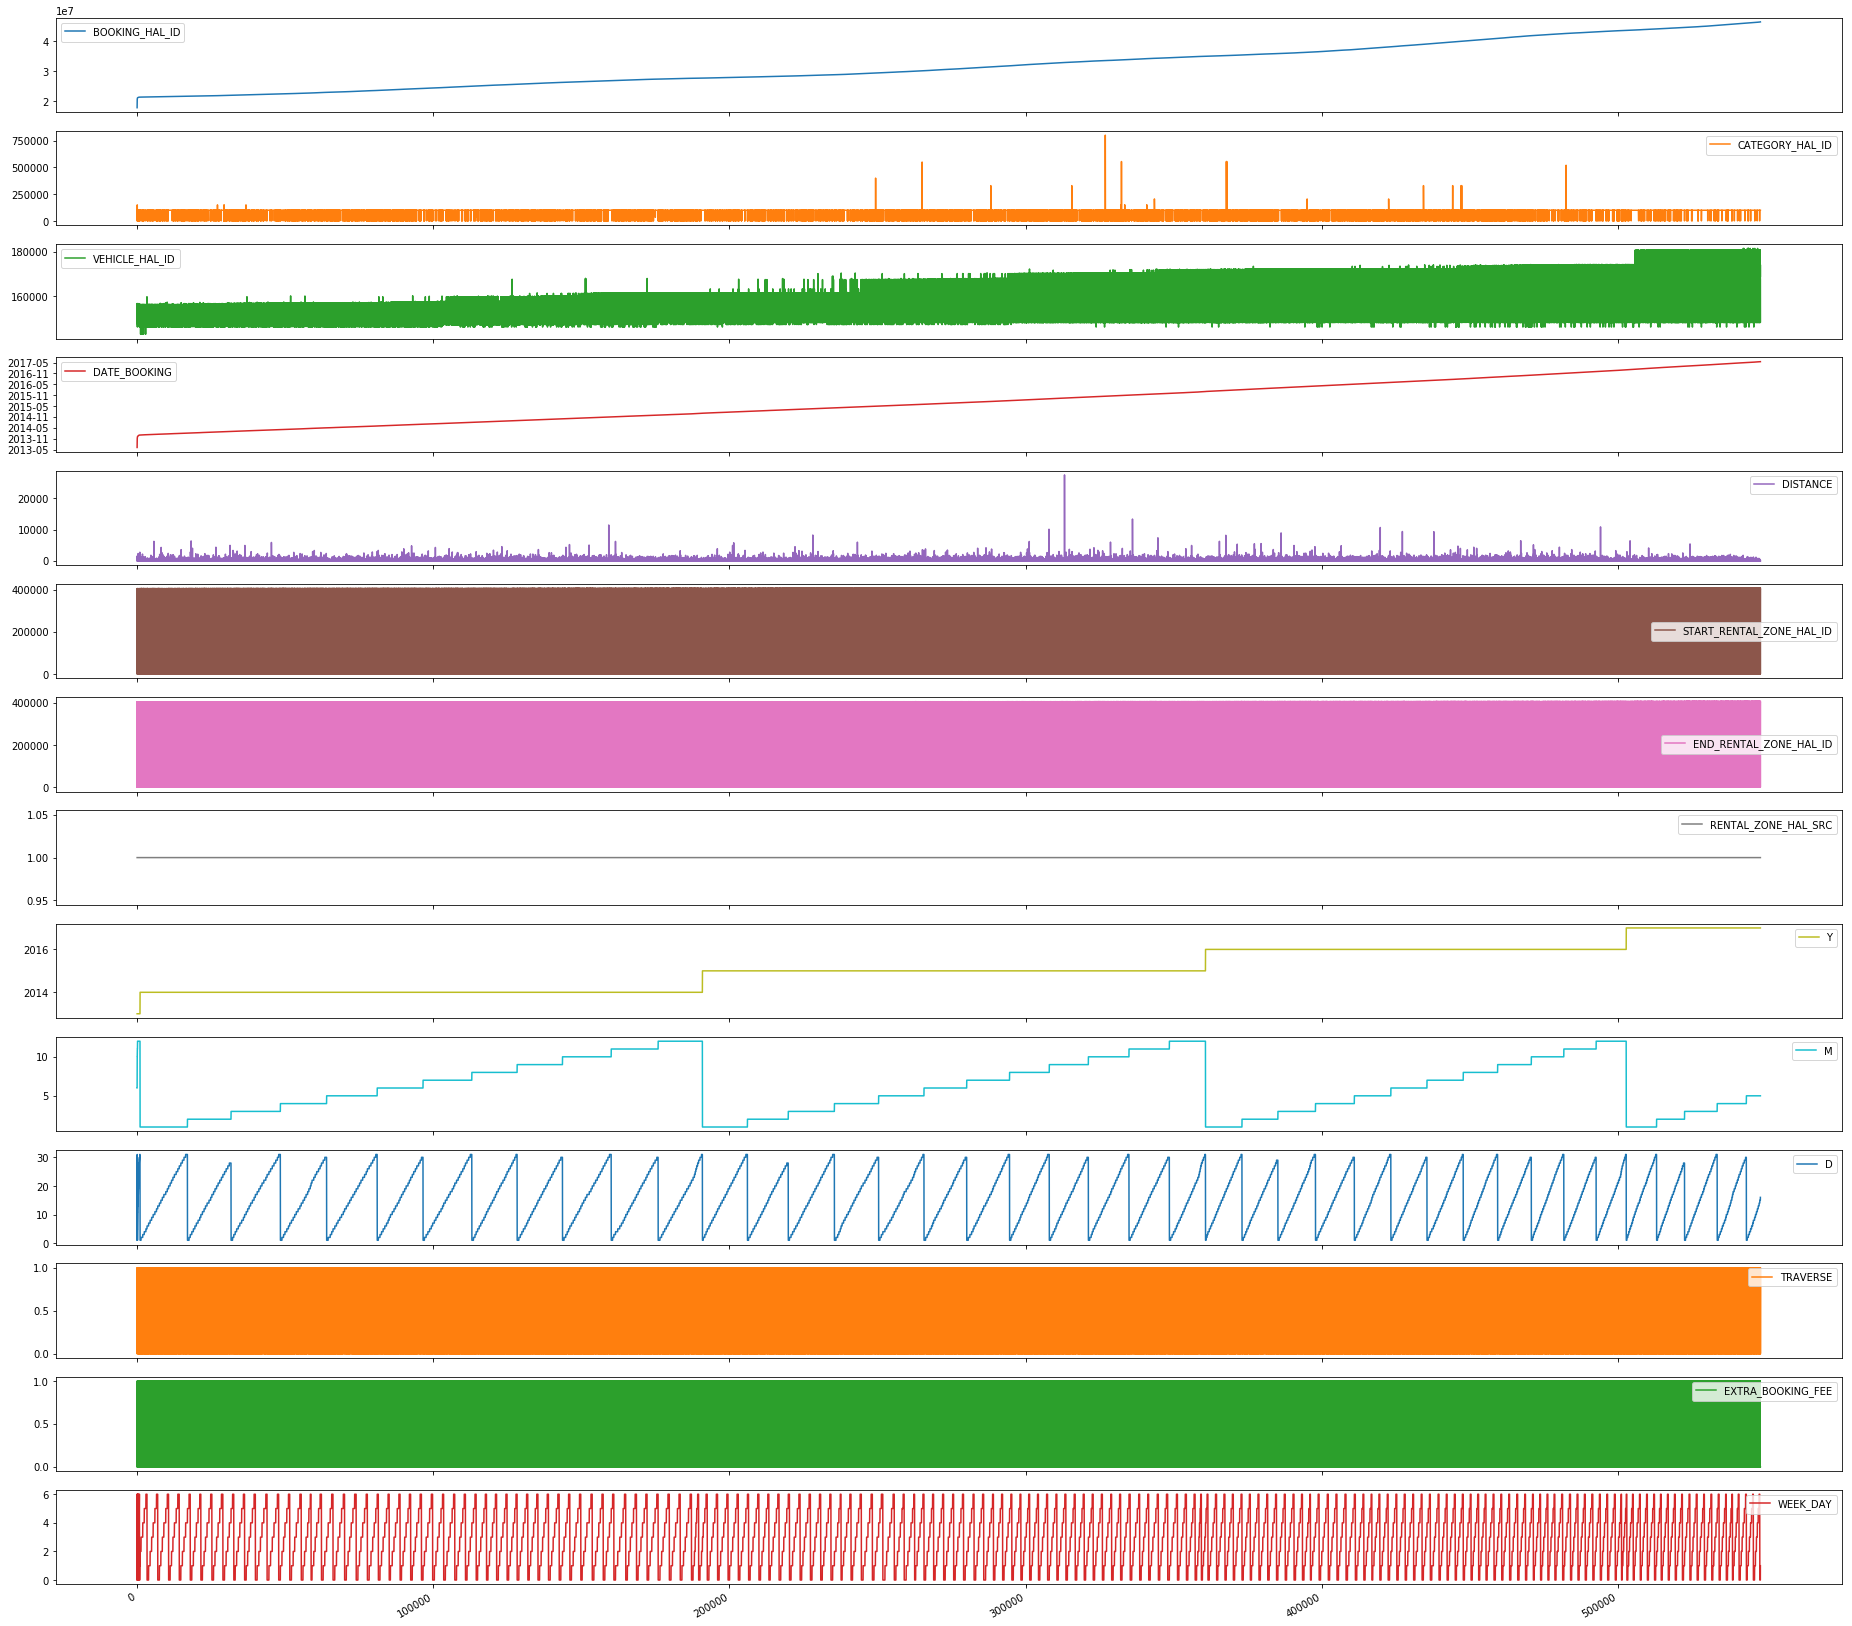

In [26]:
#plotting the no. of customers with the bookings.
db_data.plot(subplots =True, figsize =(32,32)) #x = db_data['BOOKING_HAL_ID'] , y = db_data['CUSTOMER_HAL_ID'])

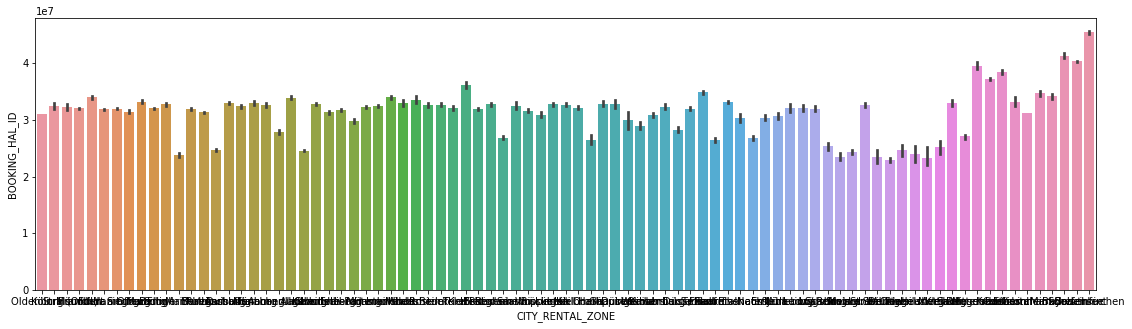

In [7]:
db_data['BOOKING_HAL_ID'].value_counts()
# all are unique value
plt.figure(figsize = (19,5))
sns.barplot(x = 'CITY_RENTAL_ZONE' , y = 'BOOKING_HAL_ID' , data = db_data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200E9370EF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000200DDCA7C18>], dtype=object)

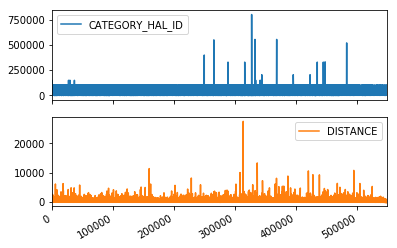

In [10]:
#list =['BOOKING_HAL_ID','CUSTOMER_HAL_ID']
#bookings_per_customer = db_data.pivot(index =['BOOKING_HAL_ID'] , values = 'CUSTOMER_HAL_ID')
#bookings_per_customer
db_data[['CATEGORY_HAL_ID', 'DATE_BOOKING','DISTANCE']].plot(subplots=True , legend = True)